# Conditional edges

In [1]:
from typing import Annotated, Literal
from typing_extensions import TypedDict
from langgraph.graph import END, START, StateGraph

In [2]:
# Helper
def visualize_graph(graph):
    from IPython.display import Image, display
    try:
        display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
    except Exception:
        # This requires some extra dependencies and is optional
        pass

In [4]:
def add(left, right):
    return left + right


class State(TypedDict):
    total: Annotated[int, add]

In [9]:
builder = StateGraph(State)
builder.add_node("add_one", lambda x: {"total": 1})
builder.add_node("plus_10", lambda x: {"total": x["total"] + 10})
builder.add_node("minus_10", lambda x: {"total": x["total"] - 10})
builder.add_edge(START, "add_one")


def route(state: State) -> Literal["plus_10", "minus_10"]:
    if state["total"] < 5:
        return "plus_10"
    else:
        return "minus_10"


builder.add_conditional_edges("add_one", route)
builder.add_edge("plus_10", END)
builder.add_edge("minus_10", END)

graph = builder.compile()

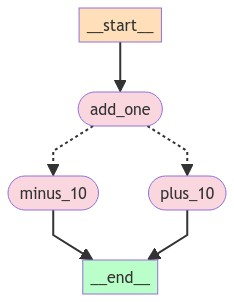

In [10]:
visualize_graph(graph)

In [27]:
graph.invoke({"total": 12})

{'total': 16}